# Rain Prediction in Galle, Sri Lanka
## Group Members:

*   Govindu Thejana
*   Yasiru Kularathne



# Introduction
[This project focuses on predicting how much rain will fall in Galle, Sri Lanka,
covering the period from January 1, 2010, to January 1, 2023. We will use past
weather data to create models that forecast future rainfall. Accurate rain
predictions will be useful for managing water resources, planning agricultural
activities, and most importantly preparing for potential weather-related
emergencies.
]



# Literature Survey
[Rainfall plays a crucial role in the balance of natural ecosystems, agriculture, and water resource management. In regions like Galle, Sri Lanka, predicting rainfall is essential not only for optimizing agricultural practices but also for mitigating the adverse effects of flooding. By leveraging historical weather data and predictive models, it becomes possible to make informed decisions, ensuring safety and sustainability.]


# Dataset Description
[About Dataset
The Sri Lanka Weather Dataset is a comprehensive collection of weather data for 30 prominent cities in Sri Lanka, covering the period from January 1, 2010, to January 1, 2023. The dataset offers a wide range of meteorological parameters, enabling detailed analysis and insights into the climate patterns of different regions in Sri Lanka.

The dataset includes information such as:

Time: The timestamp of each weather observation.

Weather Code: A numerical code representing the weather conditions at the given time.

Temperature: Maximum, minimum, and mean values of 2-meter temperature.

Apparent Temperature: Maximum, minimum, and mean values of apparent temperature, which takes into account factors like wind chill or heat index.

Sunrise and Sunset: The times of sunrise and sunset for each day.
Shortwave Radiation: Sum of shortwave radiation received during the observation period.

Precipitation: Total sum of precipitation, including rainfall and snowfall.

Precipitation Hours: The duration of time with measurable precipitation.

Wind Speed and Gusts: Maximum values of wind speed and wind gusts at 10 meters above ground level.

Wind Direction: Dominant wind direction at 10 meters above ground level.
Evapotranspiration: Reference evapotranspiration (ET0) based on the FAO Penman-Monteith equation.

Latitude, Longitude, and Elevation: Geographic coordinates and elevation of each city.

Country and City: Names of the country and city corresponding to each weather observation.

This dataset was sourced from Open-Meteo and simplemaps, and the data was collected using a basic Python script. The collected data was pre-processed to ensure cleanliness and readability before being stored in CSV format.]


Importing Libraries


In [ ]:
import numpy as np  # Importing NumPy for numerical operations and linear algebra
import pandas as pd  # Importing pandas for data manipulation and analysis
import folium  # Importing folium for creating interactive maps
import matplotlib.pyplot as plt  # Importing Matplotlib for creating visualizations
import seaborn as sns  # Importing Seaborn for advanced statistical data visualization
from sklearn.linear_model import LinearRegression  # Importing LinearRegression from scikit-learn for regression analysis


Matplotlib Graphs


In [ ]:
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

Mounting from google drive

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
#drive.mount('/content/drive')

# Direct download link
direct_link = 'https://drive.google.com/uc?id=1APm7ZjFKApC5FakU_wgezqF8D2_7aaW-'

# Read the CSV from Google Drive
weather = pd.read_csv(direct_link)

# Check the data
print(weather.head())
# Print the shape of the dataframe


         time  weathercode  temperature_2m_max  temperature_2m_min  \
0  2010-01-01            2                30.0                22.7   
1  2010-01-02           51                29.9                23.5   
2  2010-01-03           51                29.5                23.2   
3  2010-01-04            2                28.9                21.9   
4  2010-01-05            1                28.1                21.3   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0                 26.1                      34.4                      25.2   
1                 26.2                      33.8                      26.2   
2                 26.0                      34.3                      26.3   
3                 25.3                      31.6                      23.4   
4                 24.5                      30.1                      23.1   

   apparent_temperature_mean           sunrise            sunset  ...  \
0                       29.2  2010-01

In [ ]:
# Print the shape of the dataframe
weather.shape

(147480, 24)

# Exploratory Data Analysis




In [ ]:
print("Data Info:")
weather.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   time                        147480 non-null  object 
 1   weathercode                 147480 non-null  int64  
 2   temperature_2m_max          147480 non-null  float64
 3   temperature_2m_min          147480 non-null  float64
 4   temperature_2m_mean         147480 non-null  float64
 5   apparent_temperature_max    147480 non-null  float64
 6   apparent_temperature_min    147480 non-null  float64
 7   apparent_temperature_mean   147480 non-null  float64
 8   sunrise                     147480 non-null  object 
 9   sunset                      147480 non-null  object 
 10  shortwave_radiation_sum     147480 non-null  float64
 11  precipitation_sum           147480 non-null  float64
 12  rain_sum                    147480 non-null  float64
 13  sno

Display the map of weather Data




<ipython-input-79-5f9fccf8c870>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_precipitation = weather_Galle.resample('Y')['precipitation_sum'].sum()


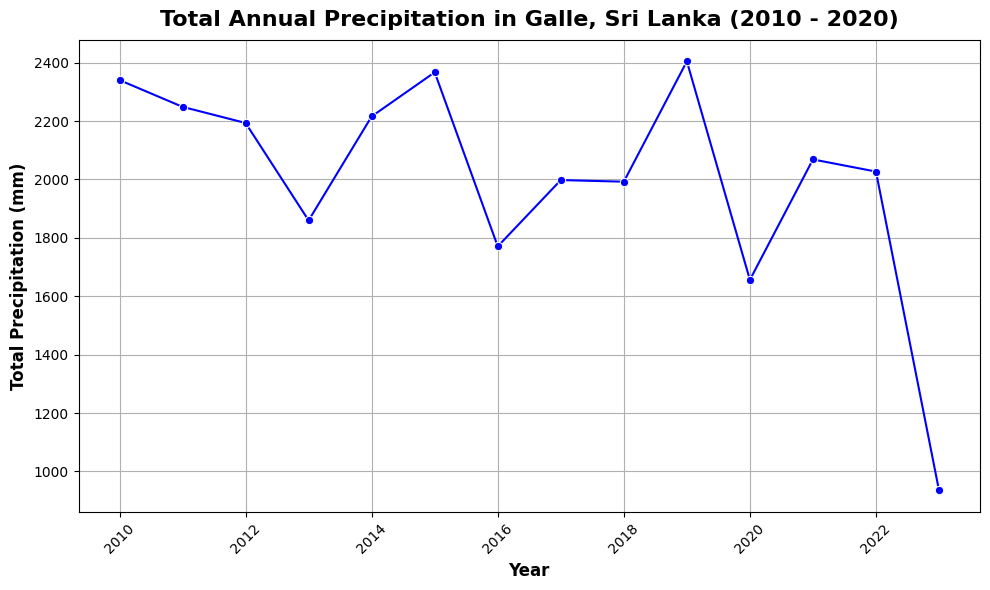

In [ ]:
# Ensure 'time' column is in datetime format
weather['time'] = pd.to_datetime(weather['time'])

# Filter the dataset for the city of Galle
weather_Galle = weather[weather['city'] == 'Galle']

# Set 'time' as the index
weather_Galle = weather_Galle.set_index('time')

# Group the data by year and calculate total annual precipitation
annual_precipitation = weather_Galle.resample('Y')['precipitation_sum'].sum()

# Convert the result to a DataFrame for easier plotting
annual_precipitation_df = annual_precipitation.reset_index()
annual_precipitation_df['year'] = annual_precipitation_df['time'].dt.year
annual_precipitation_df = annual_precipitation_df[['year', 'precipitation_sum']]
annual_precipitation_df.columns = ['year', 'total_precipitation']

# Plotting the annual precipitation
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='total_precipitation', data=annual_precipitation_df, marker='o', color='b')
plt.title('Total Annual Precipitation in Galle, Sri Lanka (2010 - 2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Precipitation (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

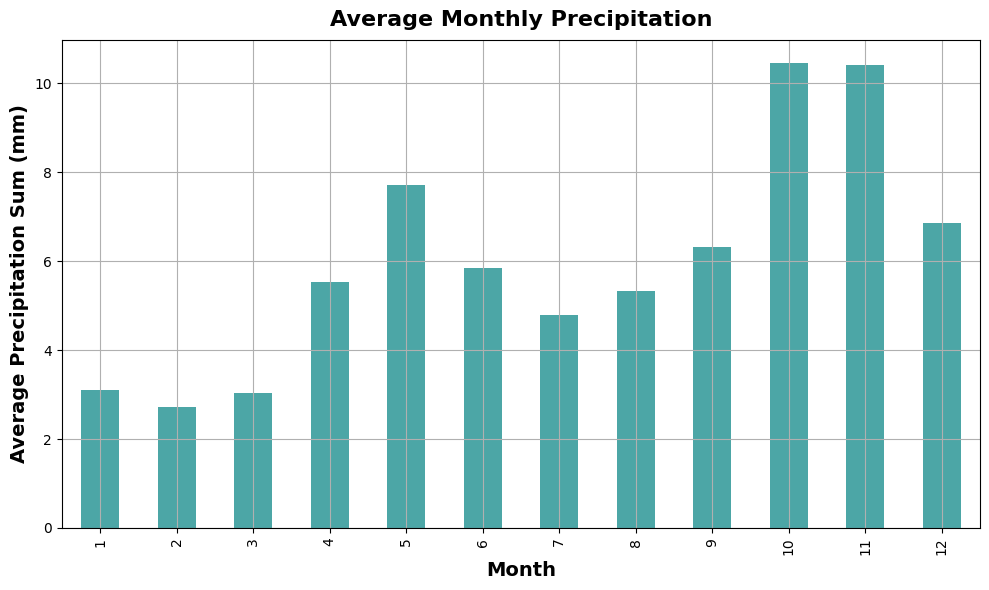

In [ ]:
# Convert 'time' column to datetime
weather['time'] = pd.to_datetime(weather['time'])

# Group by month and calculate average precipitation
monthly_precipitation = weather.groupby(weather['time'].dt.month)['precipitation_sum'].mean()

# Plot monthly precipitation
plt.figure(figsize=(10, 6))
monthly_precipitation.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Average Monthly Precipitation', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Precipitation Sum (mm)', fontsize=14)
plt.grid(True)
plt.show()

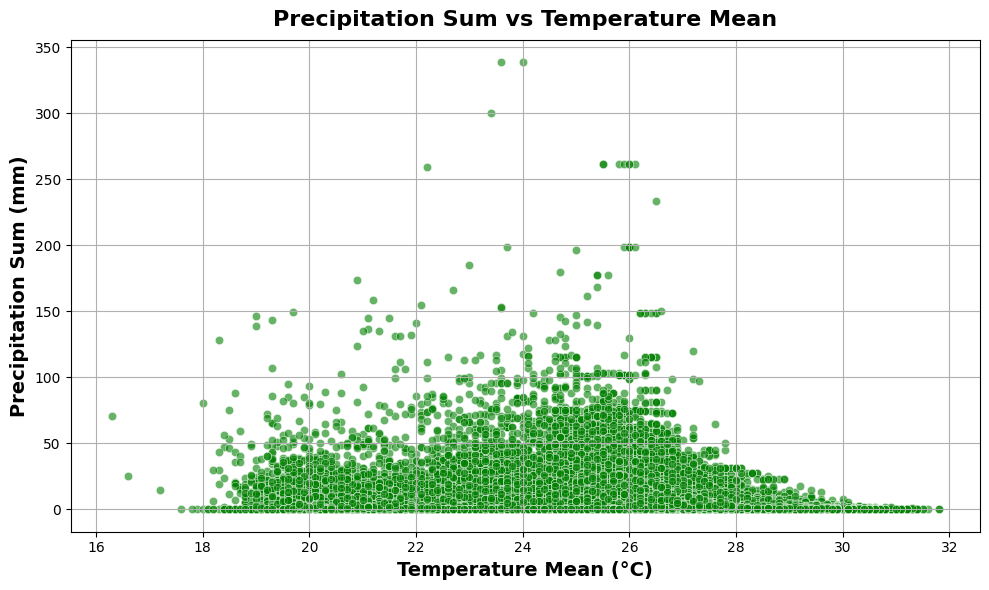

In [ ]:
# Scatter plot: Precipitation vs Temperature Mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature_2m_mean', y='precipitation_sum', data=weather, alpha=0.6, color='green')
plt.title('Precipitation Sum vs Temperature Mean', fontsize=16)
plt.xlabel('Temperature Mean (°C)', fontsize=14)
plt.ylabel('Precipitation Sum (mm)', fontsize=14)
plt.grid(True)
plt.show()


# Data Preprocessing


In [ ]:
# Filter the dataset for the city of Galle

weather_Galle = weather[weather['city'] == 'Galle']

# Drop unnecessary columns
columns_to_drop = ['country', 'latitude', 'longitude', 'elevation', 'city', 'sunrise', 'sunset']
weather_Galle = weather_Galle.drop(columns=columns_to_drop)

print(weather_Galle.head())

            time  weathercode  temperature_2m_max  temperature_2m_min  \
54076 2010-01-01           51                30.6                24.3   
54077 2010-01-02           51                29.7                25.3   
54078 2010-01-03           51                28.5                24.9   
54079 2010-01-04           53                27.4                23.6   
54080 2010-01-05            3                28.9                22.8   

       temperature_2m_mean  apparent_temperature_max  \
54076                 27.0                      37.0   
54077                 26.9                      36.6   
54078                 26.3                      35.0   
54079                 25.7                      33.3   
54080                 26.0                      32.6   

       apparent_temperature_min  apparent_temperature_mean  \
54076                      28.9                       32.5   
54077                      30.2                       32.5   
54078                      30.0       

In [ ]:
# Verify if missing values are handled
print(weather_Galle.isnull().sum())

time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
dtype: int64


In [ ]:
#check categorical values
print(weather_Galle.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4916 entries, 54076 to 58991
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        4916 non-null   datetime64[ns]
 1   weathercode                 4916 non-null   int64         
 2   temperature_2m_max          4916 non-null   float64       
 3   temperature_2m_min          4916 non-null   float64       
 4   temperature_2m_mean         4916 non-null   float64       
 5   apparent_temperature_max    4916 non-null   float64       
 6   apparent_temperature_min    4916 non-null   float64       
 7   apparent_temperature_mean   4916 non-null   float64       
 8   shortwave_radiation_sum     4916 non-null   float64       
 9   precipitation_sum           4916 non-null   float64       
 10  rain_sum                    4916 non-null   float64       
 11  snowfall_sum                4916 non-null   float64     

In [ ]:
# prompt: code for checking the duplicate values

import pandas as pd
def check_duplicate_rows(df):

  duplicate_rows = df[df.duplicated(keep=False)]  # keep=False marks all duplicates
  return duplicate_rows

# Example usage (assuming 'weather' DataFrame from your code)
duplicate_rows_df = check_duplicate_rows(weather_Galle)

if not duplicate_rows_df.empty:
  print("Duplicate Rows:")
  print(duplicate_rows_df)
else:
  print("No duplicate rows found.")


def check_duplicate_columns(df):

  duplicate_cols = []
  for i in range(df.shape[1]):
    for j in range(i + 1, df.shape[1]):
        if df.iloc[:, i].equals(df.iloc[:, j]):
            duplicate_cols.append(df.columns[j])
  return duplicate_cols

# Example usage:
duplicate_columns = check_duplicate_columns(weather)
if duplicate_columns:
    print("Duplicate columns:", duplicate_columns)
else:
    print("No duplicate columns found.")

No duplicate rows found.
Duplicate columns: ['rain_sum']


In [ ]:
# Drop the 'rain_sum' column
weather_Galle = weather_Galle.drop(columns=['rain_sum'])

print(weather_Galle.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4916 entries, 54076 to 58991
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        4916 non-null   datetime64[ns]
 1   weathercode                 4916 non-null   int64         
 2   temperature_2m_max          4916 non-null   float64       
 3   temperature_2m_min          4916 non-null   float64       
 4   temperature_2m_mean         4916 non-null   float64       
 5   apparent_temperature_max    4916 non-null   float64       
 6   apparent_temperature_min    4916 non-null   float64       
 7   apparent_temperature_mean   4916 non-null   float64       
 8   shortwave_radiation_sum     4916 non-null   float64       
 9   precipitation_sum           4916 non-null   float64       
 10  snowfall_sum                4916 non-null   float64       
 11  precipitation_hours         4916 non-null   float64     

In [ ]:
# Convert 'time' column to datetime format
weather_Galle['time'] = pd.to_datetime(weather_Galle['time'])

# Extract date-related features: month and day
weather_Galle['month'] = weather_Galle['time'].dt.month
weather_Galle['day'] = weather_Galle['time'].dt.day

# Drop the original 'month' column as it is now encoded cyclically
weather_Galle = weather_Galle.drop(columns=['month'])


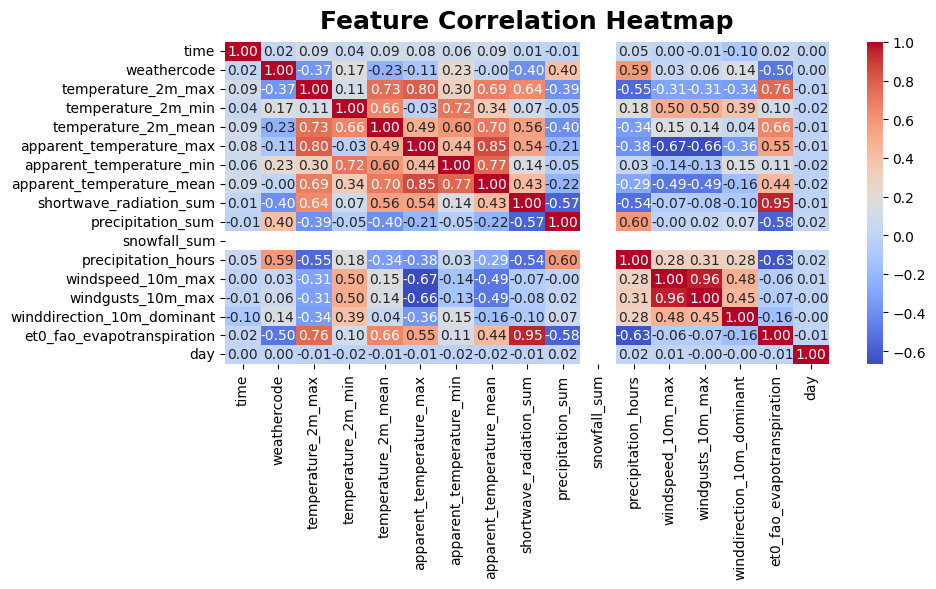

In [ ]:

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weather_Galle.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# Define feature set (X) and target variable (y)
selected_columns = [
    'weathercode', 'temperature_2m_mean', 'apparent_temperature_mean',
    'precipitation_hours', 'et0_fao_evapotranspiration','apparent_temperature_max']

Boxplots

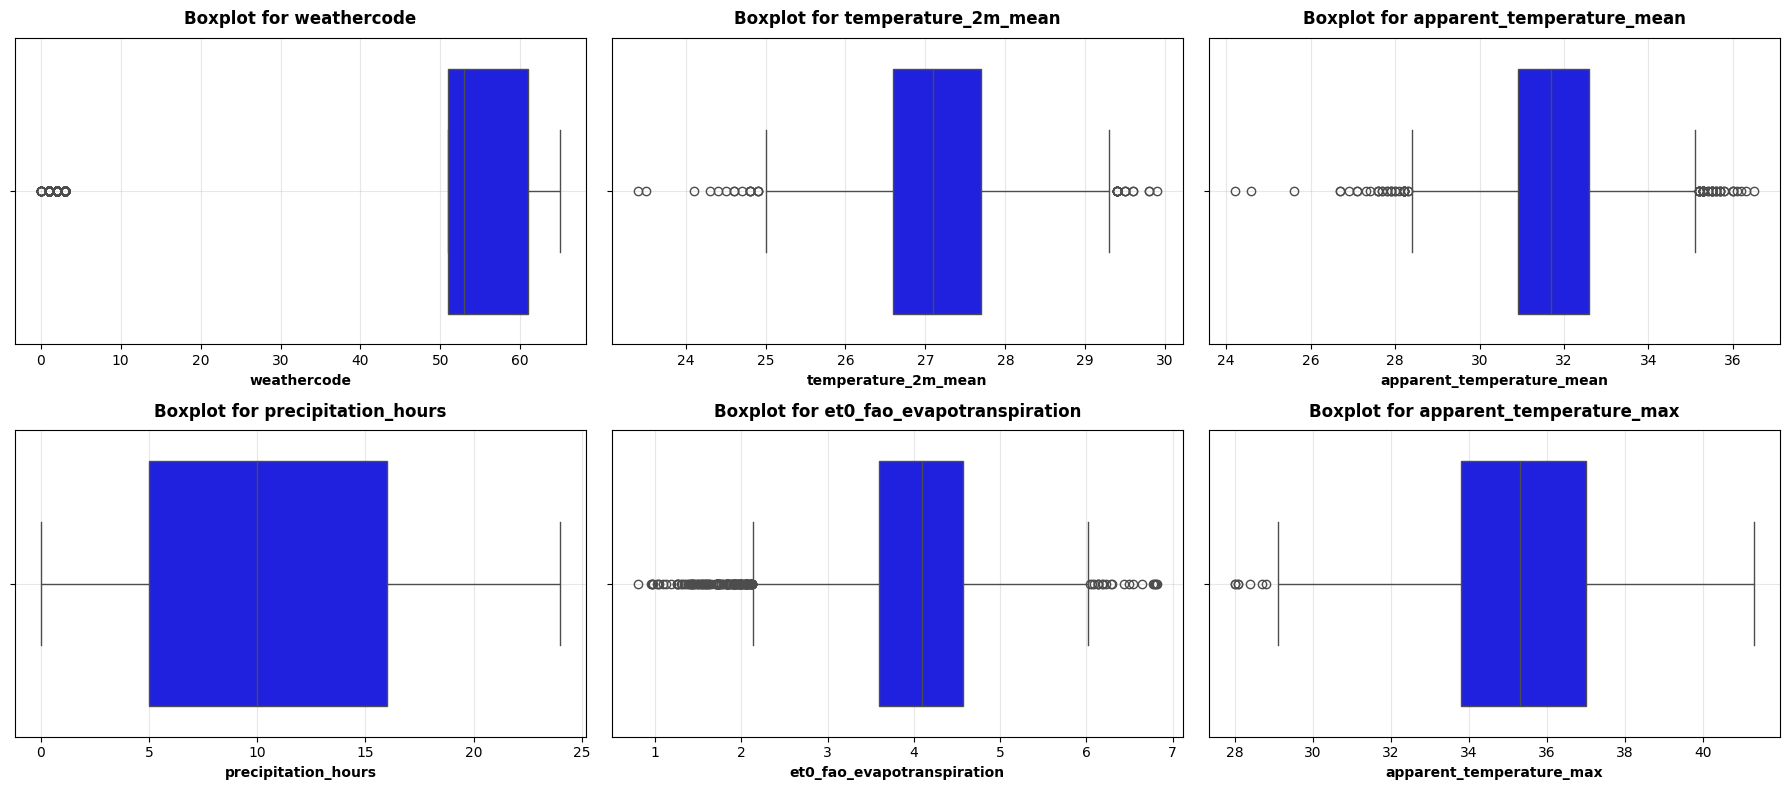

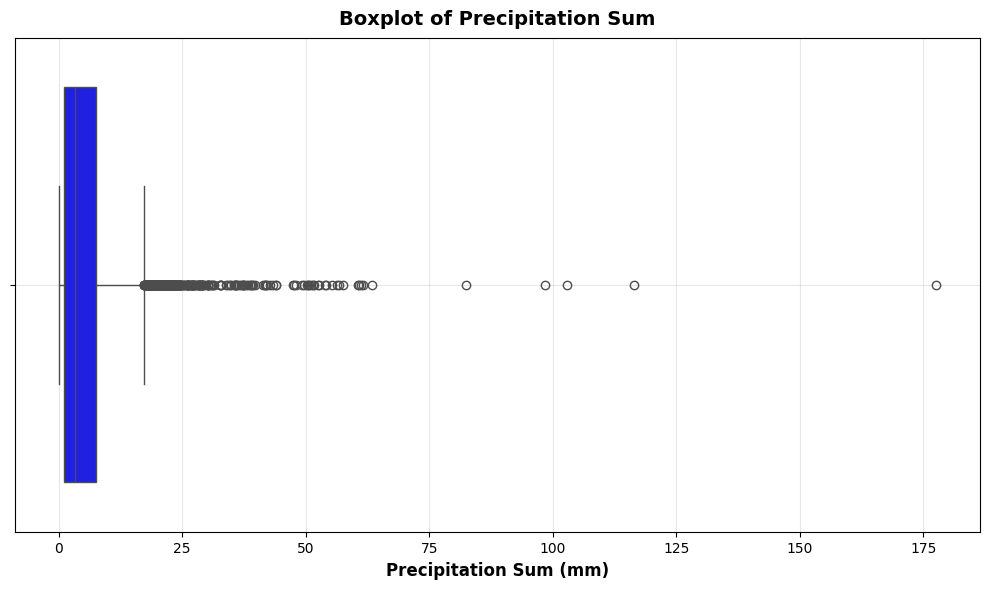

In [ ]:
weather_Galle_selected_columns = weather_Galle[selected_columns]
# Identify numerical columns
numerical_columns = weather_Galle_selected_columns.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure
num_cols = len(numerical_columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calculate rows for 3 columns per row
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 4))  # Adjust figure size

# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through numerical columns and create boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=weather_Galle[column], ax=axes[i], color='blue', orient='h')  # Horizontal boxplot
    axes[i].set_title(f"Boxplot for {column}", fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].grid(alpha=0.3)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

# Generate box plot for 'precipitation_sum'
plt.figure(figsize=(10, 6))
sns.boxplot(x=weather_Galle['precipitation_sum'], color='blue', orient='h')
plt.title('Boxplot of Precipitation Sum', fontsize=14)
plt.xlabel('Precipitation Sum (mm)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Clip 'precipitation_sum' at the 99th percentile
weather_Galle['precipitation_sum'] = weather_Galle['precipitation_sum'].clip(upper=weather_Galle['precipitation_sum'].quantile(0.99))

# **Model Implementation**

In [ ]:
# Import StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
#Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

X = weather_Galle[selected_columns]
y = weather_Galle['precipitation_sum']


# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the selected columns
X_scaled = scaler.fit_transform(X)


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)



In [ ]:
#Model Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model Performance")

# R² Scores
print(f"Training R²: {r2_score(y_train, y_train_preds):.2f}")
print(f"Testing R²: {r2_score(y_test, y_test_preds):.2f}")

# Mean Squared Error (MSE)
print(f"Training Mean Squared Error (MSE): {mean_squared_error(y_train, y_train_preds):.2f}")
print(f"Testing Mean Squared Error (MSE): {mean_squared_error(y_test, y_test_preds):.2f}")

# Mean Absolute Error (MAE)
print(f"Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_train_preds):.2f}")
print(f"Testing Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_test_preds):.2f}")


Model Performance
Training R²: 0.59
Testing R²: 0.56
Training Mean Squared Error (MSE): 18.61
Testing Mean Squared Error (MSE): 20.32
Training Mean Absolute Error (MAE): 2.99
Testing Mean Absolute Error (MAE): 3.04


# **Improve the model Performance**




In [ ]:
# Feature Engineering: Extract date-related features
weather_Galle['month'] = weather_Galle['time'].dt.month
weather_Galle['day'] = weather_Galle['time'].dt.day
weather_Galle['month_sin'] = np.sin(2 * np.pi * weather_Galle['month'] / 12)
weather_Galle['month_cos'] = np.cos(2 * np.pi * weather_Galle['month'] / 12)

# Drop the original 'month' column
weather_Galle = weather_Galle.drop(columns=['month'])

print(weather_Galle.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4916 entries, 54076 to 58991
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        4916 non-null   datetime64[ns]
 1   weathercode                 4916 non-null   int64         
 2   temperature_2m_max          4916 non-null   float64       
 3   temperature_2m_min          4916 non-null   float64       
 4   temperature_2m_mean         4916 non-null   float64       
 5   apparent_temperature_max    4916 non-null   float64       
 6   apparent_temperature_min    4916 non-null   float64       
 7   apparent_temperature_mean   4916 non-null   float64       
 8   shortwave_radiation_sum     4916 non-null   float64       
 9   precipitation_sum           4916 non-null   float64       
 10  snowfall_sum                4916 non-null   float64       
 11  precipitation_hours         4916 non-null   float64     

In [ ]:
# Define feature set (X) and target variable (y) after feature engineering
selected_columns = [
    'weathercode', 'temperature_2m_mean', 'apparent_temperature_mean', 'shortwave_radiation_sum',
    'precipitation_hours', 'et0_fao_evapotranspiration', 'apparent_temperature_max', 'month_sin', 'month_cos', 'day']

X = weather_Galle[selected_columns]
y = weather_Galle['precipitation_sum']

# Initialize and apply StandardScaler for feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

# Model Evaluation and Discussion.




In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model Performance")

# R² Scores
print(f"Training R²: {r2_score(y_train, y_train_preds):.2f}")
print(f"Testing R²: {r2_score(y_test, y_test_preds):.2f}")

# Mean Squared Error (MSE)
print(f"Training Mean Squared Error (MSE): {mean_squared_error(y_train, y_train_preds):.2f}")
print(f"Testing Mean Squared Error (MSE): {mean_squared_error(y_test, y_test_preds):.2f}")

# Mean Absolute Error (MAE)
print(f"Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, y_train_preds):.2f}")
print(f"Testing Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_test_preds):.2f}")


Model Performance
Training R²: 0.62
Testing R²: 0.60
Training Mean Squared Error (MSE): 16.96
Testing Mean Squared Error (MSE): 18.24
Training Mean Absolute Error (MAE): 2.82
Testing Mean Absolute Error (MAE): 2.81


In [ ]:
# Cross-validation
from sklearn.model_selection import cross_val_score # Import the cross_val_score function

cv_scores = cross_val_score(model, X_scaled, y, scoring='r2', cv=5)
print("\nCross-Validation Results:")
print(f"R² Scores: {cv_scores}")
print(f"Average R² Score: {cv_scores.mean():.2f}")


Cross-Validation Results:
R² Scores: [0.63486804 0.62190782 0.6286044  0.63831578 0.51495875]
Average R² Score: 0.61


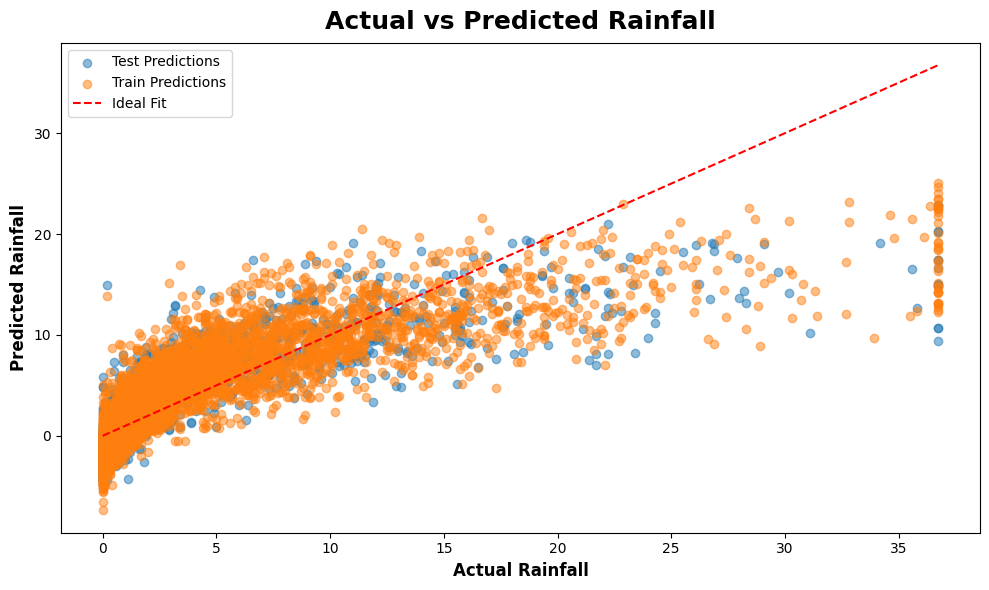

In [ ]:
# Scatter plot of actual vs predicted rainfall
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_preds, alpha=0.5, label='Test Predictions')
plt.scatter(y_train, y_train_preds, alpha=0.5, label='Train Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.show()

# **Conclusion**

#  The models we built performed moderately well:

After feature engineering, the Linear Regression model showed improved performance:

Training R² increased from 0.59 to 0.62, and Testing R² rose from 0.56 to 0.60.
MSE reduced from 18.61 to 16.96 for training and from 20.32 to 18.24 for testing.
Cross-validation confirmed an average R² of 0.61, indicating consistent performance.
These improvements highlight the value of feature engineering, particularly adding cyclical date features and scaling inputs. However, the model still struggles with capturing complex meteorological patterns, suggesting the need for non-linear models like Random Forest for further refinement.

# **References.**

https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/

https://www.kaggle.com/datasets/rasulmah/sri-lanka-weather-dataset  

## **Random Forest**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Define feature set (X) and target variable (y)
selected_columns = [
    'temperature_2m_mean', 'apparent_temperature_mean', 'shortwave_radiation_sum',
    'precipitation_hours', 'weathercode', 'et0_fao_evapotranspiration', 'month_sin', 'month_cos', 'day'
]

# **Model Implementation**

In [ ]:
X = weather_Galle[selected_columns]
y = weather_Galle['precipitation_sum']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluation Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


In [ ]:
# Display metrics
metrics = {
    "Set": ["Train", "Test"],
    "MSE": [train_mse, test_mse],
    "MAE": [train_mae, test_mae],
    "R² Score": [train_r2, test_r2],
}
metrics_df = pd.DataFrame(metrics)
print("Model Performance Metrics:\n", metrics_df)

Model Performance Metrics:
      Set       MSE       MAE  R² Score
0  Train  0.911994  0.474922  0.979677
1   Test  7.353183  1.331151  0.840410


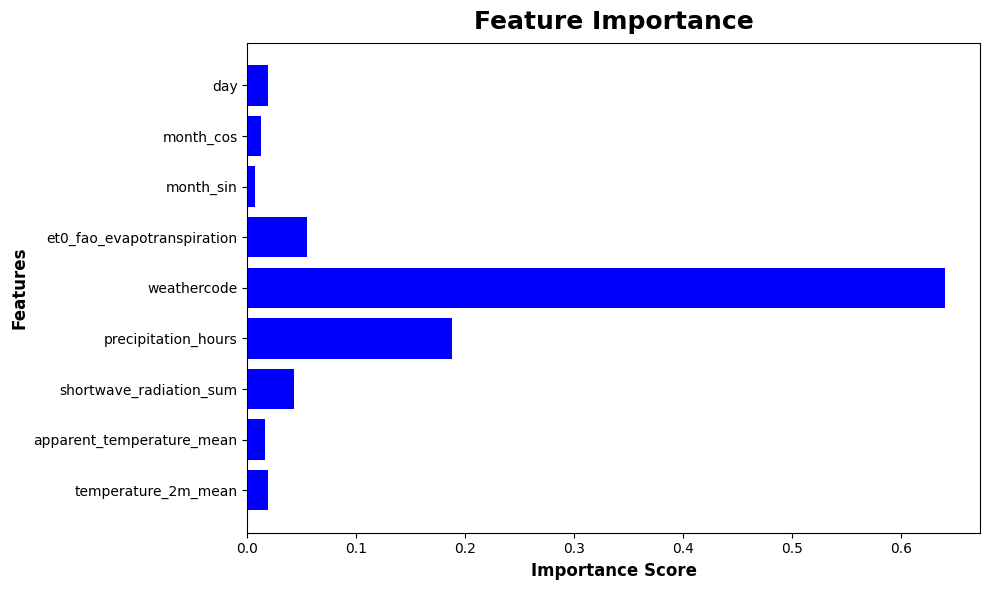

In [ ]:
# Feature Importance Visualization
importances = rf_model.feature_importances_
features = selected_columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='blue')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

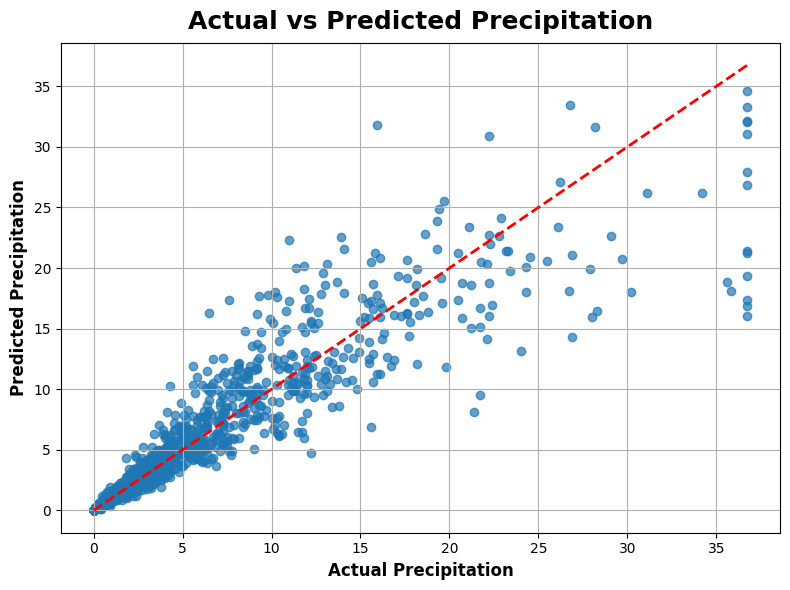

In [ ]:
# Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Precipitation")
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.grid()
plt.show()

# **Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],            # Focus on fewer tree counts
    'max_depth': [10, 20],                # Use the most relevant depth values
    'min_samples_split': [5, 10],         # Test fewer splitting strategies
    'min_samples_leaf': [2, 4],           # Focus on slightly larger leaf sizes
    'bootstrap': [True]                   # Use only bootstrap sampling
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the tuned model
best_rf_model = grid_search.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


# **Model Evaluation**

Model Performance Metrics:
      Set       MSE       MAE  R² Score
0  Train  3.328330  0.899112  0.925830
1   Test  7.717069  1.349042  0.832513


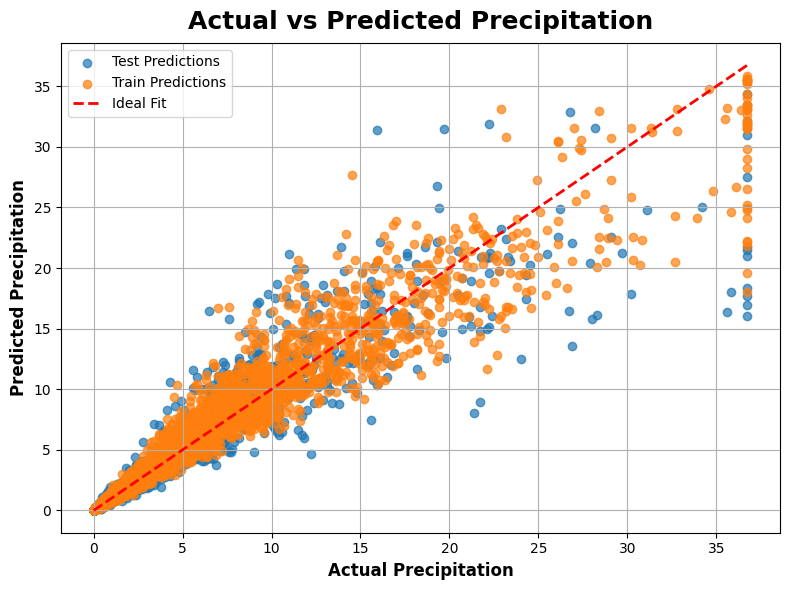

In [ ]:
# Retrieve the best estimator from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the training and test sets
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display metrics
metrics = {
    "Set": ["Train", "Test"],
    "MSE": [train_mse, test_mse],
    "MAE": [train_mae, test_mae],
    "R² Score": [train_r2, test_r2],
}
metrics_df = pd.DataFrame(metrics)
print("Model Performance Metrics:\n", metrics_df)

# Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Test Predictions')
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Train Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.title("Actual vs Predicted Precipitation")
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.legend()
plt.grid()
plt.show()

# **Discussion**

We have better performance than linear regression model,

Model Performance:

* Training R²: 0.925830
* Testing  R²: 0.832513
* Training Mean Squared Error (MSE): 3.328330
* Testing Mean Squared Error (MSE) : 7.717069
* Training Mean Absolute Error (MAE): 0.899112
* Testing Mean Absolute Error (MAE): 1.349042

Before hyperparameter tuning, the gaps between the training and testing MSE and MAE were significant. However, after tuning, these gaps narrowed, leading to better accuracy and generalization.

The Random Forest Regressor proved to be a more effective model for rainfall prediction compared to Linear Regression. It achieved a higher R-squared value of 0.83 on the testing set, indicating a better fit to the data. The lower MSE and MAE values further support its superior performance. This can be attributed to the ability of Random Forest to capture complex non-linear relationships between the features and the target variable. Feature engineering, particularly adding cyclical date features, and hyperparameter tuning using GridSearchCV further enhanced the model's accuracy